# Import the required libraries

In [1]:
# Import the required libraries 

import pandas as pd
import numpy as np
import pygeostat as gs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from IPython.display import display, Math, Latex
from IPython.display import Image
import sys
import warnings
import math
from tqdm.notebook import tqdm_notebook
from time import sleep
from tqdm import tqdm
import os, copy, shutil, sys, glob, time
from scipy import stats
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
import cmocean
import seaborn as sns
import matplotlib as mpl


In [1]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
CNN_Major = load_model('CNN_1_160.h5')
# summarize model.
CNN_Major.summary()

# Regular Sampling 

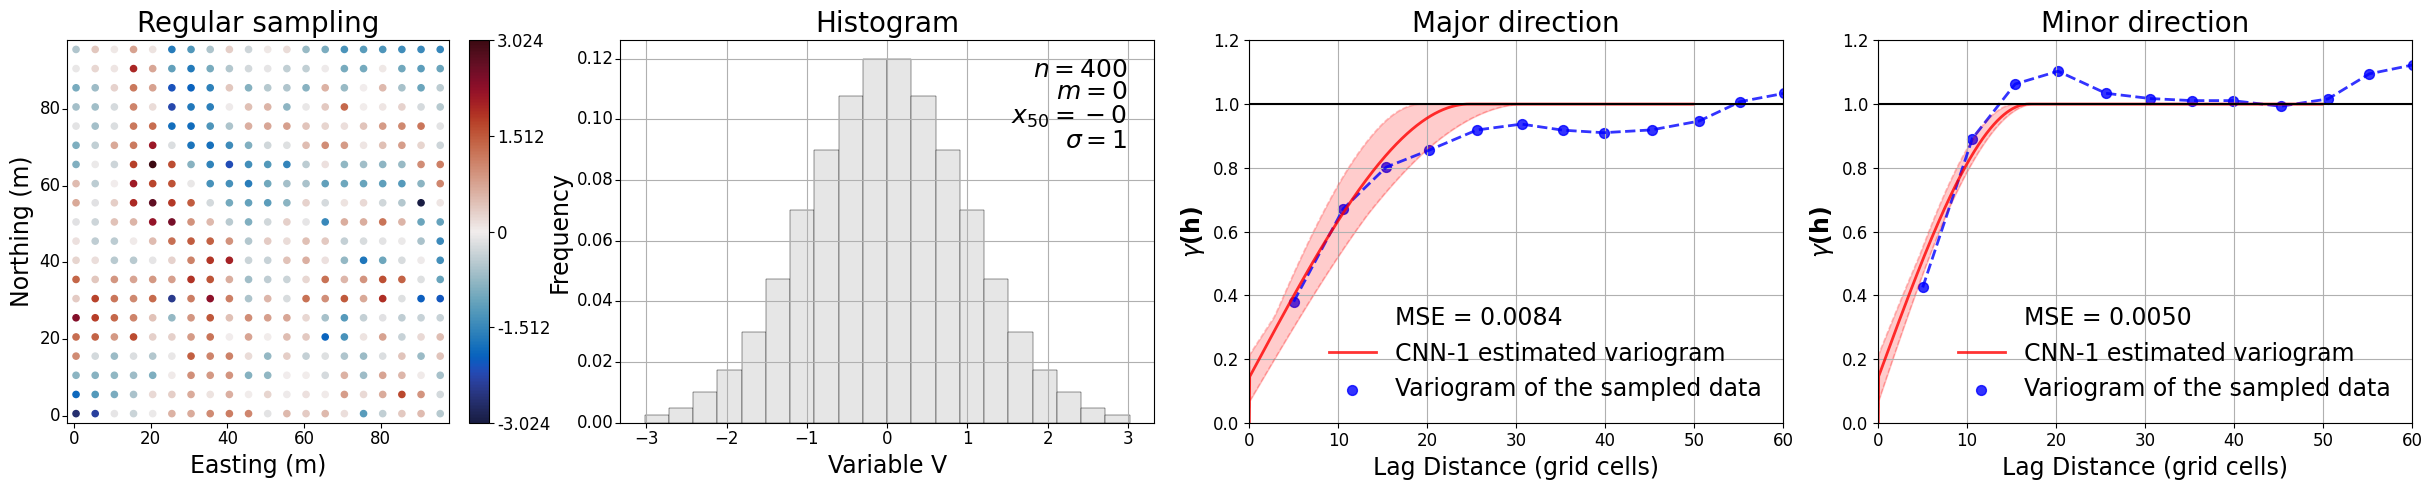

In [221]:
import matplotlib.pyplot as plt
import numpy as np

# Set parameters for all plots
params = {'legend.fontsize': 'large', 'axes.labelsize': 'large', 'axes.titlesize':'large',
         'xtick.labelsize':'large', 'ytick.labelsize':'large'}
pylab.rcParams.update(params)

# Create figure with 4 columns and 1 row
fig, axes = plt.subplots(1, 4, figsize=(10,10))

# First row, first figure
gs.location_plot(dhs_V , var='NS_value', orient='xy', title='', sigfigs=4, cmap='cmo.balance', 
                  plot_style=True, ax=axes[0],figsize=(4,4))
axes[0].set_title('Regular sampling', fontsize=20)
axes[0].set_xlabel('Easting (m)',fontsize=17);
axes[0].set_ylabel('Northing (m)',fontsize=17)
# First row, second figure
gs.histogram_plot(dhs_V , var='NS_value', bins=20, stat_blk='minimal', ax=axes[1], stat_fontsize=18,figsize=(1,4))
axes[1].set_title('Histogram', fontsize=20)
axes[1].set_xlabel('Variable V',fontsize=17);
axes[1].set_ylabel('Frequency',fontsize=17)
axes[1].grid(True)
# Second row, first figure
nreal = 20 
axes[2].plot(Datafl_Samp_Exp_Regular['Lag Distance'],Datafl_Samp_Exp_Regular['Variogram Value'],linewidth = 0,color = 'white',alpha = 0.8, label = 'MSE = 0.0084')
# Exp Sampled 
axes[2].scatter(Datafl_Samp_Exp_Regular['Lag Distance'],Datafl_Samp_Exp_Regular['Variogram Value'],marker='o',color = 'blue',s = 50,alpha = 0.8, label = 'Variogram of the sampled data')
axes[2].plot(Datafl_Samp_Exp_Regular['Lag Distance'],Datafl_Samp_Exp_Regular['Variogram Value'], color='blue', linewidth=2, alpha=0.8, linestyle='--')
# model of sampled data 
#axes[2].plot(Datafl_Samp_model_NE_Regular['Lag Distance'],Datafl_Samp_model_NE_Regular['Variogram Value'],color = 'blue',linewidth = 2,alpha = 0.8, label ='Variogram model')

# model of the prediction 
axes[2].plot(vmodel_Pred_NE_Regular['Lag Distance'],vmodel_Pred_NE_Regular['Variogram Value'],color = 'red',linewidth = 2,alpha = 0.8, label ='CNN-1 estimated variogram')
# data augmentation

#for i in range (nreal):
    #axes[2].scatter(fi_Regular[i]['Lag Distance'],fi_Regular[i]['Variogram Value'],marker='o',color = 'red',s = 0,alpha = 0.8)


axes[2].fill_between(fi_Regular[1]['Lag Distance'],max_values_Regular.reshape(1000),min_values_Regular.reshape(1000),color='red',alpha=0.2)



axes[2].plot(fi_Regular[1]['Lag Distance'],max_values_Regular.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')
axes[2].plot(fi_Regular[1]['Lag Distance'],min_values_Regular.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')

axes[2].legend(loc='lower right', fontsize=17, frameon=False)
axes[2].set_title('Major direction', fontsize=20)
axes[2].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[2].set_ylim(0,1.2) 
axes[2].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)

axes[2].plot([0,60],[1.0,1.0],color='black')
axes[2].set_xlim(0,60)
axes[2].grid(True)

axes[2].figure.set_size_inches(25, 5)



axes[3].plot(Datafl_Samp_Exp_Regular_Minor['Lag Distance'],Datafl_Samp_Exp_Regular_Minor['Variogram Value'],linewidth = 0,color = 'white',alpha = 0.8, label = 'MSE = 0.0050')
# Exp Sampled 
axes[3].scatter(Datafl_Samp_Exp_Regular_Minor['Lag Distance'],Datafl_Samp_Exp_Regular_Minor['Variogram Value'],marker='o',color = 'blue',s = 50,alpha = 0.8, label = 'Variogram of the sampled data')
axes[3].plot(Datafl_Samp_Exp_Regular_Minor['Lag Distance'],Datafl_Samp_Exp_Regular_Minor['Variogram Value'], color='blue', linewidth=2, alpha=0.8, linestyle='--')
# model of sampled data 
#axes[3].plot(Datafl_Samp_model_NE_Regular_Minor['Lag Distance'],Datafl_Samp_model_NE_Regular_Minor['Variogram Value'],color = 'blue',linewidth = 2,alpha = 0.8, label ='Variogram model')

# model of the prediction 
axes[3].plot(vmodel_Pred_NE_Regular_Minor['Lag Distance'],vmodel_Pred_NE_Regular_Minor['Variogram Value'],color = 'red',linewidth = 2,alpha = 0.8, label ='CNN-1 estimated variogram')
# data augmentation

#for i in range (nreal):
   # axes[3].scatter(fi_Regular_Minor[i]['Lag Distance'],fi_Regular_Minor[i]['Variogram Value'],marker='o',color = 'red',s = 0,alpha = 0.8)


axes[3].fill_between(fi_Regular_Minor[1]['Lag Distance'],max_values_Regular_Minor.reshape(1000),min_values_Regular_Minor.reshape(1000),color='red',alpha=0.2)



axes[3].plot(fi_Regular_Minor[1]['Lag Distance'],max_values_Regular_Minor.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')
axes[3].plot(fi_Regular_Minor[1]['Lag Distance'],min_values_Regular_Minor.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')

axes[3].legend(loc='lower right', fontsize=17, frameon=False)
axes[3].set_title('Minor direction', fontsize=20)
axes[3].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[3].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)
axes[3].set_ylim(0,1.2) 
axes[3].plot([0,60],[1.0,1.0],color='black')
axes[3].set_xlim(0,60)
axes[3].grid(True)

axes[3].figure.set_size_inches(25, 5)

plt.tight_layout()
plt.savefig('Wf_1_Regular.png')
plt.savefig('Wf_1_Regular.pdf')
plt.savefig('Wf_1_Regular.svg')

plt.show()


# Random Sampling 

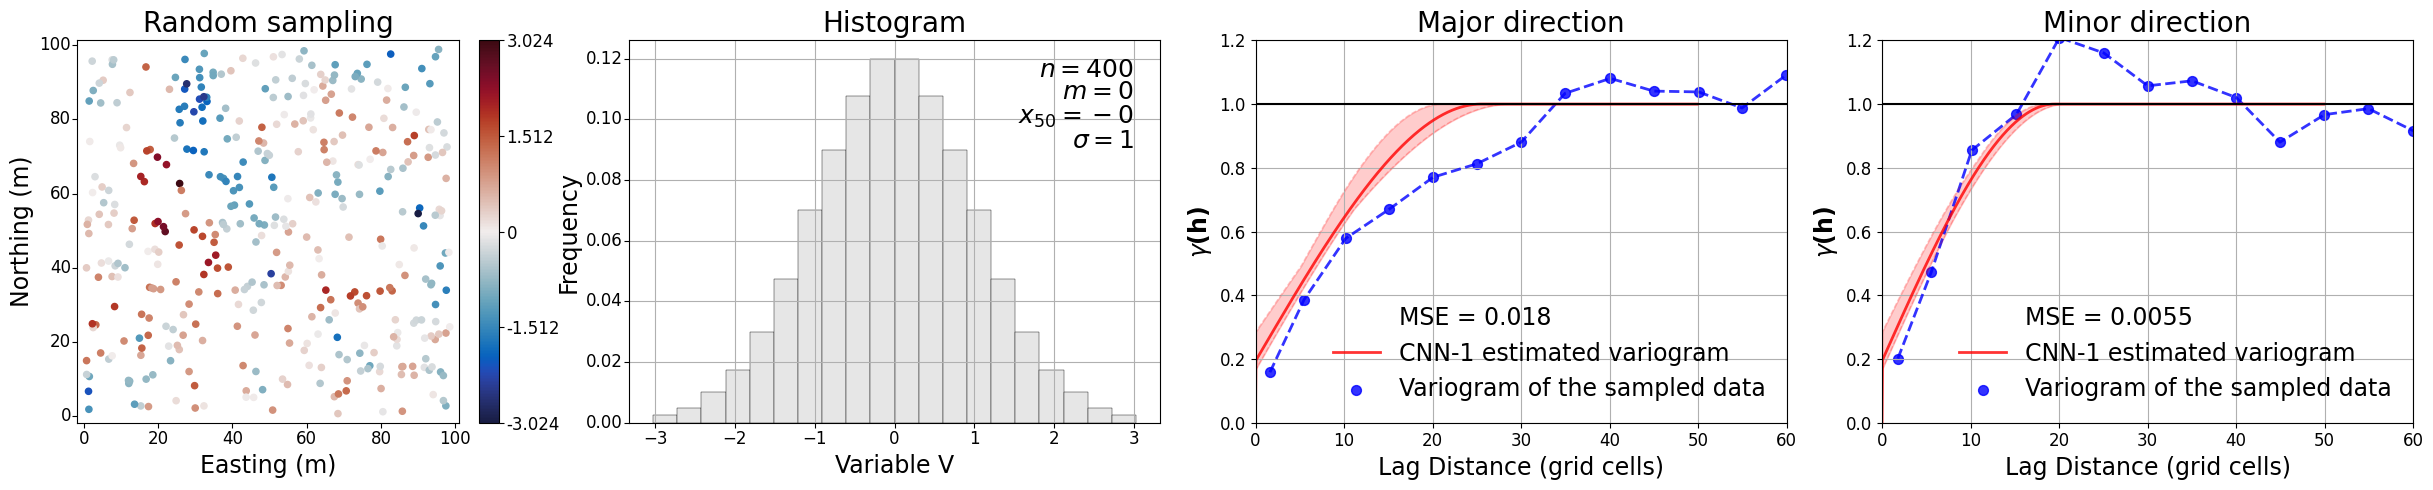

In [222]:
import matplotlib.pyplot as plt
import numpy as np

# Set parameters for all plots
params = {'legend.fontsize': 'large', 'axes.labelsize': 'large', 'axes.titlesize':'large',
         'xtick.labelsize':'large', 'ytick.labelsize':'large'}
pylab.rcParams.update(params)

# Create figure with 4 columns and 1 row
fig, axes = plt.subplots(1, 4, figsize=(10,10))

# First row, first figure
gs.location_plot(dhs_Rand_V, var='NS_value', orient='xy', title='', sigfigs=4, cmap='cmo.balance', 
                  plot_style=True, ax=axes[0],figsize=(4,4))
axes[0].set_title('Random sampling', fontsize=20)
axes[0].set_xlabel('Easting (m)',fontsize=17);
axes[0].set_ylabel('Northing (m)',fontsize=17)
# First row, second figure
gs.histogram_plot(dhs_Rand_V, var='NS_value', bins=20, stat_blk='minimal', ax=axes[1], stat_fontsize=18,figsize=(1,4))
axes[1].set_title('Histogram', fontsize=20)
axes[1].set_xlabel('Variable V',fontsize=17);
axes[1].set_ylabel('Frequency',fontsize=17)
axes[1].grid(True)
# Second row, first figure
nreal = 20 
axes[2].plot(Datafl_Samp_Exp_Random['Lag Distance'],Datafl_Samp_Exp_Random['Variogram Value'],linewidth = 0,color = 'white',alpha = 0.8, label = 'MSE = 0.018')
# Exp Sampled 
axes[2].scatter(Datafl_Samp_Exp_Random['Lag Distance'],Datafl_Samp_Exp_Random['Variogram Value'],marker='o',color = 'blue',s = 50,alpha = 0.8, label = 'Variogram of the sampled data')
axes[2].plot(Datafl_Samp_Exp_Random['Lag Distance'],Datafl_Samp_Exp_Random['Variogram Value'], color='blue', linewidth=2, alpha=0.8, linestyle='--')
# model of the prediction 
axes[2].plot(vmodel_Pred_NE_Random['Lag Distance'],vmodel_Pred_NE_Random['Variogram Value'],color = 'red',linewidth = 2,alpha = 0.8, label ='CNN-1 estimated variogram')
# data augmentation

#for i in range (nreal):
    #axes[2].scatter(fi_Random[i]['Lag Distance'],fi_Random[i]['Variogram Value'],marker='o',color = 'red',s = 0,alpha = 0.8)

axes[2].fill_between(fi_Random[1]['Lag Distance'],max_values_Random.reshape(1000),min_values_Random.reshape(1000),color='red',alpha=0.2)

axes[2].plot(fi_Random[1]['Lag Distance'],max_values_Random.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')
axes[2].plot(fi_Random[1]['Lag Distance'],min_values_Random.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')

axes[2].legend(loc='lower right', fontsize=17, frameon=False)
axes[2].set_title('Major direction', fontsize=20)
axes[2].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[2].set_ylim(0,1.2) 
axes[2].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)

axes[2].plot([0,60],[1.0,1.0],color='black')
axes[2].set_xlim(0,60)
axes[2].grid(True)

axes[2].figure.set_size_inches(25, 5)

axes[3].plot(Datafl_Samp_Exp_Random_Minor['Lag Distance'],Datafl_Samp_Exp_Random_Minor['Variogram Value'],linewidth = 0,color = 'white',alpha = 0.8, label = 'MSE = 0.0055')
# Exp Sampled 
axes[3].scatter(Datafl_Samp_Exp_Random_Minor['Lag Distance'],Datafl_Samp_Exp_Random_Minor['Variogram Value'],marker='o',color = 'blue',s = 50,alpha = 0.8, label = 'Variogram of the sampled data')
axes[3].plot(Datafl_Samp_Exp_Random_Minor['Lag Distance'],Datafl_Samp_Exp_Random_Minor['Variogram Value'], color='blue', linewidth=2, alpha=0.8, linestyle='--')
# model of the prediction 
axes[3].plot(vmodel_Pred_NE_Random_Minor['Lag Distance'],vmodel_Pred_NE_Random_Minor['Variogram Value'],color = 'red',linewidth = 2,alpha = 0.8, label ='CNN-1 estimated variogram')
# data augmentation

#for i in range (nreal):
    #axes[3].scatter(fi_Random_Minor[i]['Lag Distance'],fi_Random_Minor[i]['Variogram Value'],marker='o',color = 'red',s = 0,alpha = 0.8)

axes[3].fill_between(fi_Random_Minor[1]['Lag Distance'],max_values_Random_Minor.reshape(1000),min_values_Random_Minor.reshape(1000),color='red',alpha=0.2)

axes[3].plot(fi_Random_Minor[1]['Lag Distance'],max_values_Random_Minor.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')
axes[3].plot(fi_Random_Minor[1]['Lag Distance'],min_values_Random_Minor.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')

axes[3].legend(loc='lower right', fontsize=17, frameon=False)
axes[3].set_title('Minor direction', fontsize=20)
axes[3].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[3].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)
axes[3].set_ylim(0,1.2) 
axes[3].plot([0,60],[1.0,1.0],color='black')
axes[3].set_xlim(0,60)
axes[3].grid(True)

axes[3].figure.set_size_inches(25, 5)

plt.tight_layout()
plt.savefig('Wf_1_Random.png')
plt.savefig('Wf_1_Random.pdf')
plt.savefig('Wf_1_Random.svg')

plt.show()


# Original Sampling 

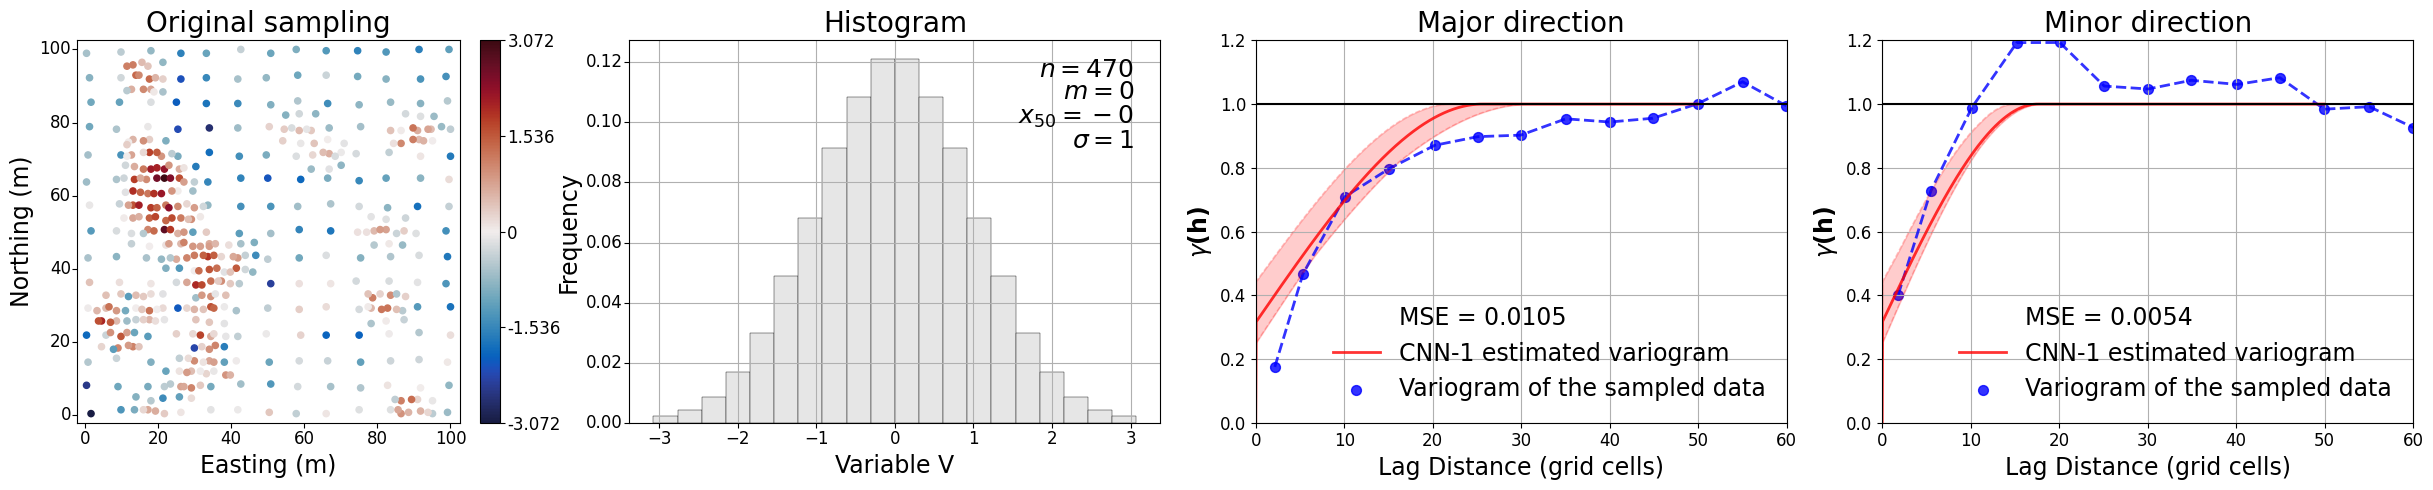

In [223]:
import matplotlib.pyplot as plt
import numpy as np

# Set parameters for all plots
params = {'legend.fontsize': 'large', 'axes.labelsize': 'large', 'axes.titlesize':'large',
         'xtick.labelsize':'large', 'ytick.labelsize':'large'}
pylab.rcParams.update(params)

# Create figure with 4 columns and 1 row
fig, axes = plt.subplots(1, 4, figsize=(10,10))

# First row, first figure
gs.location_plot(Or_100, var='NS_V', orient='xy', title='', sigfigs=4, cmap='cmo.balance', 
                  plot_style=True, ax=axes[0],figsize=(4,4))
axes[0].set_title('Original sampling', fontsize=20)
axes[0].set_xlabel('Easting (m)',fontsize=17);
axes[0].set_ylabel('Northing (m)',fontsize=17)
# First row, second figure
gs.histogram_plot(Or_100, var='NS_V', bins=20, stat_blk='minimal', ax=axes[1], stat_fontsize=18,figsize=(1,4))
axes[1].set_title('Histogram', fontsize=20)
axes[1].set_xlabel('Variable V',fontsize=17);
axes[1].set_ylabel('Frequency',fontsize=17)
axes[1].grid(True)
# Second row, first figure
nreal = 20 
axes[2].plot(Datafl_Samp_Exp_Original['Lag Distance'],Datafl_Samp_Exp_Original['Variogram Value'],linewidth = 0,color = 'white',alpha = 0.8, label = 'MSE = 0.0105')
# Exp Sampled 
axes[2].scatter(Datafl_Samp_Exp_Original['Lag Distance'],Datafl_Samp_Exp_Original['Variogram Value'],marker='o',color = 'blue',s = 50,alpha = 0.8, label = 'Variogram of the sampled data')
axes[2].plot(Datafl_Samp_Exp_Original['Lag Distance'],Datafl_Samp_Exp_Original['Variogram Value'], color='blue', linewidth=2, alpha=0.8, linestyle='--')
# model of sampled data 
#axes[2].plot(Datafl_Samp_model_NE_Original['Lag Distance'],Datafl_Samp_model_NE_Original['Variogram Value'],color = 'blue',linewidth = 2,alpha = 0.8, label ='Variogram model')

# model of the prediction 
axes[2].plot(vmodel_Pred_NE_Original['Lag Distance'],vmodel_Pred_NE_Original['Variogram Value'],color = 'red',linewidth = 2,alpha = 0.8, label ='CNN-1 estimated variogram')
# data augmentation

#for i in range (nreal):
   # axes[2].scatter(fi_Original[i]['Lag Distance'],fi_Original[i]['Variogram Value'],marker='o',color = 'red',s = 0,alpha = 0.8)


axes[2].fill_between(fi_Original[1]['Lag Distance'],max_values_Original.reshape(1000),min_values_Original.reshape(1000),color='red',alpha=0.2)



axes[2].plot(fi_Original[1]['Lag Distance'],max_values_Original.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')
axes[2].plot(fi_Original[1]['Lag Distance'],min_values_Original.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')

axes[2].legend(loc='lower right', fontsize=17, frameon=False)
axes[2].set_title('Major direction', fontsize=20)
axes[2].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[2].set_ylim(0,1.2) 
axes[2].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)

axes[2].plot([0,60],[1.0,1.0],color='black')
axes[2].set_xlim(0,60)
axes[2].grid(True)

axes[2].figure.set_size_inches(25, 5)







axes[3].plot(Datafl_Samp_Exp_Original_Minor['Lag Distance'],Datafl_Samp_Exp_Original_Minor['Variogram Value'],linewidth = 0,color = 'white',alpha = 0.8, label = 'MSE = 0.0054')
# Exp Sampled 
axes[3].scatter(Datafl_Samp_Exp_Original_Minor['Lag Distance'],Datafl_Samp_Exp_Original_Minor['Variogram Value'],marker='o',color = 'blue',s = 50,alpha = 0.8, label = 'Variogram of the sampled data')
axes[3].plot(Datafl_Samp_Exp_Original_Minor['Lag Distance'],Datafl_Samp_Exp_Original_Minor['Variogram Value'], color='blue', linewidth=2, alpha=0.8, linestyle='--')
# model of sampled data 
#axes[3].plot(Datafl_Samp_model_NE_Original_Minor['Lag Distance'],Datafl_Samp_model_NE_Original_Minor['Variogram Value'],color = 'blue',linewidth = 2,alpha = 0.8, label ='Variogram model')

# model of the prediction 
axes[3].plot(vmodel_Pred_NE_Original_Minor['Lag Distance'],vmodel_Pred_NE_Original_Minor['Variogram Value'],color = 'red',linewidth = 2,alpha = 0.8, label ='CNN-1 estimated variogram')
# data augmentation

#for i in range (nreal):
    #axes[3].scatter(fi_Original_Minor[i]['Lag Distance'],fi_Original_Minor[i]['Variogram Value'],marker='o',color = 'red',s = 0,alpha = 0.8)


axes[3].fill_between(fi_Original_Minor[1]['Lag Distance'],max_values_Original_Minor.reshape(1000),min_values_Original_Minor.reshape(1000),color='red',alpha=0.2)



axes[3].plot(fi_Original_Minor[1]['Lag Distance'],max_values_Original_Minor.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')
axes[3].plot(fi_Original_Minor[1]['Lag Distance'],min_values_Original_Minor.reshape(1000),color = 'red',linewidth = 1,alpha = 0.2,linestyle='--')

axes[3].legend(loc='lower right', fontsize=17, frameon=False)
axes[3].set_title('Minor direction', fontsize=20)
axes[3].set_xlabel('Lag Distance (grid cells)',fontsize=17);
axes[3].set_ylabel(r'$\gamma \bf(h)$',fontsize=17)
axes[3].set_ylim(0,1.2) 
axes[3].plot([0,60],[1.0,1.0],color='black')
axes[3].set_xlim(0,60)
axes[3].grid(True)



axes[3].figure.set_size_inches(25, 5)

plt.tight_layout()
plt.savefig('Wf_1_Original.png')
plt.savefig('Wf_1_Original.pdf')
plt.savefig('Wf_1_Original.svg')

plt.show()
